In [43]:
#Compilation of triangle pattern

%load_ext autoreload
%autoreload 2

# general imports
import numpy as np
import math
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice
from braket.device_schema.device_action_properties import DeviceActionType
import numpy as np

%load_ext autoreload
from utils import Plotter, DeviceUtils, BraketTaskScanner, DeviceScanner
from utils_qft import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
tri = Circuit()

tri.cnot(0,1).cnot(1,2).cnot(2,0)

print(tri)

T  : |0|1|2|
            
q0 : -C---X-
      |   | 
q1 : -X-C-|-
        | | 
q2 : ---X-C-

T  : |0|1|2|


#Circuit computes a strange function

f(i,j,k) = (j+k, i+j, i+j+k)

In [45]:
device = LocalSimulator()
n_qubits = 3

for i in range(2**n_qubits):
    test_circ = Circuit()
    test_circ.integer_input(range(n_qubits),i).add(tri)

    #print(test_circ)

    results = device.run(test_circ, shots = 1000).result()

    print(format(i, "0"+ str(n_qubits) +"b"), results.measurement_counts)

000 Counter({'000': 1000})
001 Counter({'101': 1000})
010 Counter({'111': 1000})
011 Counter({'010': 1000})
100 Counter({'011': 1000})
101 Counter({'110': 1000})
110 Counter({'100': 1000})
111 Counter({'001': 1000})


In [28]:
test_circ = Circuit().integer_input(range(n_qubits), 4).add(tri)
print(test_circ)

device = DeviceUtils.get_device("rigetti")

qtask = device.run(test_circ, shots = 100)

print(qtask._arn)

T  : |0|1|2|3|
              
q0 : -X-C---X-
        |   | 
q1 : ---X-C-|-
          | | 
q2 : -----X-C-

T  : |0|1|2|3|
arn:aws:braket:us-west-1:058017682654:quantum-task/03e0c450-de0a-426f-b75b-ffdc0a399f84


In [46]:
tri_task = "arn:aws:braket:us-west-1:058017682654:quantum-task/f9ea5908-23da-4231-92da-c5ba2ff159fe"

scanner = BraketTaskScanner(task_arn = tri_task)

print(scanner.get_status())
print(scanner.cost_extimate())

COMPLETED
0.3350000000


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
OPENQASM 3.0;
bit[3] b;
qubit[3] q;
x q[0];
cnot q[0], q[1];
cnot q[1], q[2];
cnot q[2], q[0];
b[0] = measure q[0];
b[1] = measure q[1];
b[2] = measure q[2];
####################
DECLARE ro BIT[3]
PRAGMA INITIAL_REWIRING "PARTIAL"
RESET
RZ(-0.8876671289692497) 121
RX(pi/2) 121
RZ(pi) 121
RX(-pi/2) 121
RZ(3.824721851415454) 121
RZ(-pi/2) 122
RX(pi/2) 122
RZ(pi/2) 122
CZ 121 122
RZ(-3*pi/2) 122
RX(pi/2) 122
RZ(4.499986097998033) 122
RZ(-3*pi/2) 135
RX(pi/2) 135
RZ(1.7831992091815552) 135
XY(pi) 122 135
RZ(-pi) 121
RX(pi/2) 121
RZ(0.4228621372751338) 121
RZ(-3.353995535976452) 122
RX(pi/2) 122
RZ(5.8603231699044525) 122
CZ 121 122
RZ(-0.42286213727513333) 121
RX(pi/2) 121
RZ(pi/2) 121
RZ(0.23141367370929844) 122
RX(pi/2) 122
RZ(pi) 122
RX(-pi/2) 122
RZ(1.3793478632290612) 122
RZ(-1.358393444408237) 135
MEASURE 122 ro[2]
MEASURE 135 ro[1]
MEASURE 121 ro[0]



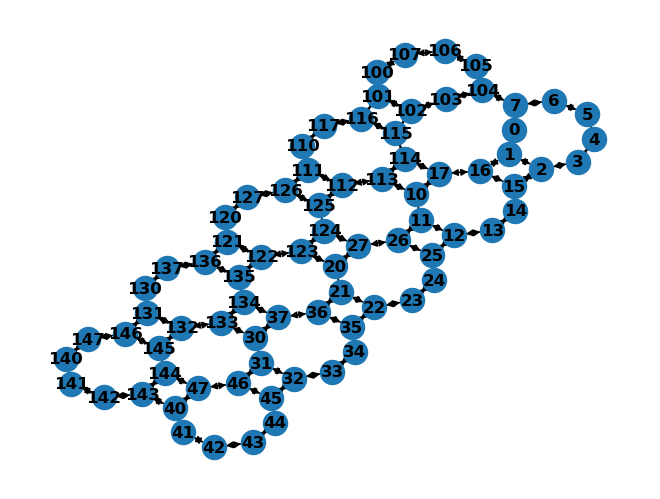

In [47]:
device_s = DeviceScanner(device = scanner.get_device())

device_s.plot_topology()

print(scanner.get_circuit())
print("####################")
print(scanner.get_compiled_circuit())